In [25]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [26]:
ligand_file = "kraken_DFT.xlsx"

In [27]:
ligands = pd.read_excel(ligand_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )


In [28]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [29]:
ligands = ligands[['sphericity_boltz',
             'surface_area_boltz',
             'volume_boltz',
             'pyr_P_boltz',
             'pyr_P_min',
             'pyr_P_max',
             'pyr_P_delta',
             'pyr_P_vburminconf',
             'pyr_alpha_boltz',
            'pyr_alpha_min',
            'pyr_alpha_max',
            'pyr_alpha_delta',
            'pyr_alpha_vburminconf',
            'sterimol_B1_boltz',
            'sterimol_B1_min',
            'sterimol_B1_max',
            'sterimol_B1_delta',
            'sterimol_B1_vburminconf',
            'sterimol_B5_boltz',
            'sterimol_B5_min',
            'sterimol_B5_max',
            'sterimol_B5_delta',
            'sterimol_B5_vburminconf',
            'sterimol_L_boltz',
            'sterimol_L_min',
            'sterimol_L_max',
            'sterimol_L_delta',
            'sterimol_L_vburminconf',
            'sterimol_burB1_boltz',
            'sterimol_burB1_min',
            'sterimol_burB1_max',
            'sterimol_burB1_delta',
            'sterimol_burB1_vburminconf',
            'sterimol_burB5_boltz',
            'sterimol_burB5_min',
            'sterimol_burB5_max',
            'sterimol_burB5_delta',
            'sterimol_burB5_vburminconf',
            'sterimol_burL_boltz',
            'sterimol_burL_min',
            'sterimol_burL_max',
            'sterimol_burL_delta',
            'sterimol_burL_vburminconf',
            'vbur_vtot_boltz',
            'vbur_ratio_vbur_vtot_boltz',
            'vbur_vbur_boltz',
            'vbur_vbur_min',
            'vbur_vbur_max',
            'vbur_vbur_delta',
            'vbur_vbur_vburminconf',
            'vbur_qvbur_min_boltz',
            'vbur_qvbur_min_min',
            'vbur_qvbur_min_max',
            'vbur_qvbur_min_delta',
            'vbur_qvbur_min_vburminconf',
            'vbur_qvbur_max_boltz',
            'vbur_qvbur_max_min',
            'vbur_qvbur_max_max',
            'vbur_qvbur_max_delta',
            'vbur_qvbur_max_vburminconf',
            'vbur_qvtot_min_boltz',
            'vbur_qvtot_min_min',
            'vbur_qvtot_min_max',
            'vbur_qvtot_min_delta',
            'vbur_qvtot_min_vburminconf',
            'vbur_qvtot_max_boltz',
            'vbur_qvtot_max_min',
            'vbur_qvtot_max_max',
            'vbur_qvtot_max_delta',
            'vbur_qvtot_max_vburminconf',
            'vbur_max_delta_qvbur_boltz',
            'vbur_max_delta_qvbur_min',
            'vbur_max_delta_qvbur_max',
            'vbur_max_delta_qvbur_delta',
            'vbur_max_delta_qvbur_vburminconf',
            'vbur_max_delta_qvtot_boltz',
            'vbur_max_delta_qvtot_min',
            'vbur_max_delta_qvtot_max',
             'vbur_max_delta_qvtot_delta',
             'vbur_max_delta_qvtot_vburminconf',
             'vbur_ovbur_min_boltz',
             'vbur_ovbur_min_min',
             'vbur_ovbur_min_max',
             'vbur_ovbur_min_delta',
             'vbur_ovbur_min_vburminconf',
             'vbur_ovbur_max_boltz',
             'vbur_ovbur_max_min',
             'vbur_ovbur_max_max',
             'vbur_ovbur_max_delta',
             'vbur_ovbur_max_vburminconf',
             'vbur_ovtot_min_boltz',
             'vbur_ovtot_min_min',
             'vbur_ovtot_min_max',
             'vbur_ovtot_min_delta',
             'vbur_ovtot_min_vburminconf',
             'vbur_ovtot_max_boltz',
             'vbur_ovtot_max_min',
             'vbur_ovtot_max_max',
             'vbur_ovtot_max_delta',
             'vbur_ovtot_max_vburminconf',
             'vbur_near_vbur_boltz',
             'vbur_near_vbur_min',
             'vbur_near_vbur_max',
             'vbur_near_vbur_delta',
             'vbur_near_vbur_vburminconf',
             'vbur_far_vbur_boltz',
             'vbur_far_vbur_min',
             'vbur_far_vbur_max',
             'vbur_far_vbur_delta',
             'vbur_far_vbur_vburminconf',
             'vbur_near_vtot_boltz',
             'vbur_near_vtot_min',
             'vbur_near_vtot_max',
             'vbur_near_vtot_delta',
             'vbur_near_vtot_vburminconf',
             'vbur_far_vtot_boltz',
             'vbur_far_vtot_min',
             'vbur_far_vtot_max',
             'vbur_far_vtot_delta',
             'vbur_far_vtot_vburminconf']]



ligands.head()

,sphericity_boltz,surface_area_boltz,volume_boltz,pyr_P_boltz,pyr_P_min,pyr_P_max,pyr_P_delta,pyr_P_vburminconf,pyr_alpha_boltz,pyr_alpha_min,...,vbur_near_vtot_boltz,vbur_near_vtot_min,vbur_near_vtot_max,vbur_near_vtot_delta,vbur_near_vtot_vburminconf,vbur_far_vtot_boltz,vbur_far_vtot_min,vbur_far_vtot_max,vbur_far_vtot_delta,vbur_far_vtot_vburminconf
0,0.704737,534.283633,687.005572,0.925709,0.841070,0.952596,0.111526,0.899423,18.814261,14.921945,...,418.630842,398.155797,559.500529,161.344732,555.129392,141.280869,0.0,157.820103,157.820103,3.614927
1,0.741325,465.644951,603.018126,0.931082,0.873397,0.952334,0.078937,0.888127,18.101491,14.899067,...,416.022948,393.007819,494.614803,101.606984,494.614803,79.387886,0.0,103.043657,103.043657,0.000000
2,0.732618,444.004694,551.589799,0.931197,0.843186,0.944014,0.100829,0.878678,18.110994,16.181093,...,381.227367,370.452031,458.051377,87.599345,458.051377,74.877624,0.0,89.733055,89.733055,0.000000
3,0.711353,506.576716,643.162366,0.929776,0.867741,0.948104,0.080363,0.896718,18.275157,15.615404,...,427.987766,410.711938,530.853346,120.141408,526.238416,100.482919,0.0,119.524405,119.524405,3.346426
4,0.746387,399.793430,484.624425,0.930566,0.860283,0.948789,0.088506,0.860283,18.175336,15.519946,...,347.720593,327.210122,402.558769,75.348647,402.558769,52.789323,0.0,74.852398,74.852398,0.070504


In [30]:
ligands = clean_dataset(ligands)

In [31]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [32]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=8,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [33]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [34]:
pipe.fit(ligands)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_init=50,
                                         random_state=42))]))])

/Users/tht13/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


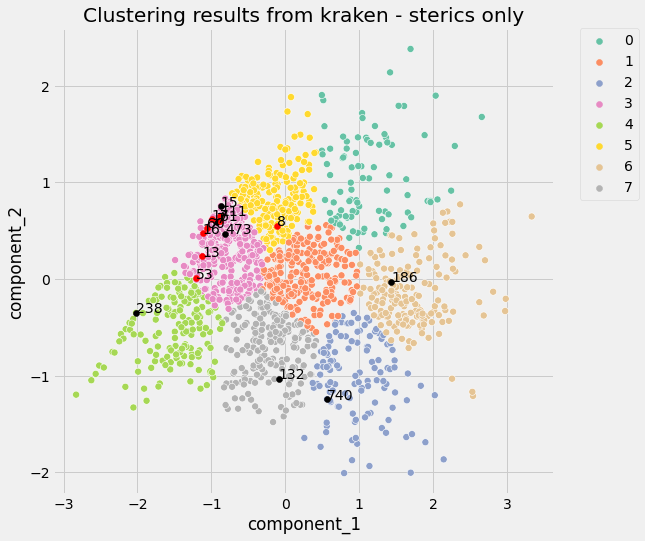

In [35]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(ligands),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette="Set2",
)

scat.set_title(
    "Clustering results from kraken - sterics only"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

positive = [132,238,7,15,473,740,186]
negative = [13,111,60,8,61,17,53,16]

for i in positive:
    plt.scatter(pcadf.loc[i][0], pcadf.loc[i][1], color='Black')
    plt.annotate(i, (pcadf.loc[i][0], pcadf.loc[i][1]))
for i in negative:
    plt.scatter(pcadf.loc[i][0], pcadf.loc[i][1], color='Red')
    plt.annotate(i, (pcadf.loc[i][0], pcadf.loc[i][1]))

plt.show()

In [23]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ligands)
    distortions.append(kmeanModel.inertia_)

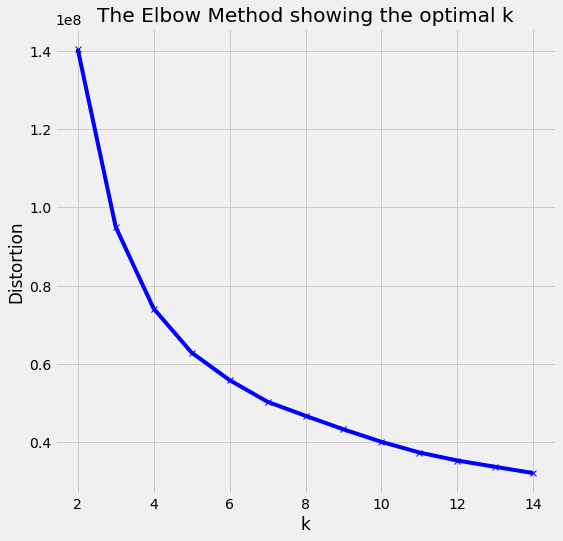

In [24]:
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()